<a href="https://colab.research.google.com/github/INmais/notebooks/blob/main/Tutorial_I_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data

## Aim

*   Show how to access data stored in diferent places (not locally)
*   How to read diferent types of data, namely related to energy

*   Dont't send data by e-mail as a method (e-mails is for messages not data)
*   Use the same files across teams (avoid the "what version sindrom")





##Libraries

base (pandas, numpy is alreay installed), if using colab you need to install):



In [1]:
! pip install geopandas #reading shapefiles
! pip install contextily #context geo tiles in Python
! pip install entsoe-py #entsoe API

In [2]:
#base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from pathlib import Path
#Maps
import geopandas as gpd

## Reading from Google Drive

#### Using your @tecnico.ulisboa.pt account 
How to set up and use, see: https://si.tecnico.ulisboa.pt/en/servicos/servicos-externos/google-suite-for-education/)

##### Using shared drives, namely if working in groups)
(Besides your own drive you can set up a shared drive)

In [3]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
# files in "content/drive/Shared drives/Reliable Project".
!ls "/content/drive/Shared drives/Reliable Project"

'Listagens SCE - IST Reliable.rar'  'Reliable.zip (Unzipped Files)'
 Reliable.zip


In [5]:
import os
os.chdir('/content/drive/Shared drives/Reliable Project/Reliable.zip (Unzipped Files)') # Provide the new path here

## Reading from Github

You need to get path to the "raw file", so using "Data Science for Social Good Portugal Repo: https://github.com/dssg-pt/covid19pt-data

Eg. select "data.csv" file ("https://github.com/dssg-pt/covid19pt-data/blob/master/data.csv"), then click on "Raw"

Copy the path "https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv" and: 

In [6]:
DATA_FILEPATH = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv' 
data = pd.read_csv(DATA_FILEPATH, parse_dates=[0], index_col=[0], infer_datetime_format=True)
data.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,recuperados,obitos,internados,internados_uci,lab,suspeitos,vigilancia,n_confirmados,cadeias_transmissao,transmissao_importada,confirmados_0_9_f,confirmados_0_9_m,confirmados_10_19_f,confirmados_10_19_m,confirmados_20_29_f,confirmados_20_29_m,confirmados_30_39_f,confirmados_30_39_m,confirmados_40_49_f,confirmados_40_49_m,confirmados_50_59_f,confirmados_50_59_m,confirmados_60_69_f,confirmados_60_69_m,confirmados_70_79_f,confirmados_70_79_m,confirmados_80_plus_f,confirmados_80_plus_m,sintomas_tosse,...,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro,recuperados_arsnorte,recuperados_arscentro,recuperados_arslvt,recuperados_arsalentejo,recuperados_arsalgarve,recuperados_acores,recuperados_madeira,recuperados_estrangeiro,obitos_0_9_f,obitos_0_9_m,obitos_10_19_f,obitos_10_19_m,obitos_20_29_f,obitos_20_29_m,obitos_30_39_f,obitos_30_39_m,obitos_40_49_f,obitos_40_49_m,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reading from GoogleSheets

Using Waze open data

Percent Change Driven Miles/Kilometers by Day

https://www.waze.com/en-GB/covid19 
https://github.com/ActiveConclusion/COVID19_mobility

1: Save as google sheets, where the path for sharing (remember to open for anyone with a link) is 

https://docs.google.com/spreadsheets/d/13wFVbvoV8k_jj0902s0LICwe24AlBZv6kh_0IeyYYuc/edit#gid=0

2: then: replace this last part: "edit#gid=0" for "export?format=csv&gid=0", where "gid=" + "000" is the sheet (be carefull when selecting the sheet you want to get)

In [7]:
Waze_lisbon_url  = 'https://docs.google.com/spreadsheets/d/18lQJeYPi2dfqI2NfAW80hIIcg2oJKjgRssuqvnolIq0/export?format=csv&gid=0'
Waze_lisbon = pd.read_csv(Waze_lisbon_url,header=0, sep=',', parse_dates=[0], index_col=[0], infer_datetime_format=True)
Waze_lisbon

,City,Country,% Change In Waze Driven Miles/KMs
Date,,,
2020-07-03,Lisbon,Portugal,-0.53
2020-07-02,Lisbon,Portugal,-0.45
2020-07-01,Lisbon,Portugal,-0.39
2020-06-30,Lisbon,Portugal,-0.40
2020-06-29,Lisbon,Portugal,-0.43
...,...,...,...
2020-03-05,Lisbon,Portugal,0.02
2020-03-04,Lisbon,Portugal,0.04
2020-03-03,Lisbon,Portugal,0.09


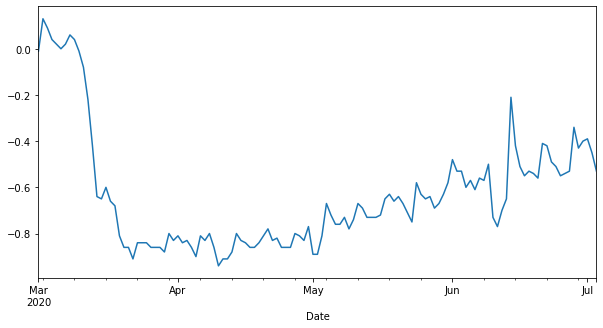

In [10]:
Waze_lisbon['% Change In Waze Driven Miles/KMs'].plot(figsize=(10,5))

## Reading from an API

ENTSOE Transparency Platform: https://transparency.entsoe.eu/dashboard/show

Using ENTSOE API
("To request access to the Restful API, please register on the Transparency Platform and send an email to transparency@entsoe.eu with “Restful API access” in the subject line. Indicate the email address you entered during registration in the email body. The ENTSO-E Helpdesk will make their best efforts to respond to your request within 3 working days."

user guide: https://transparency.entsoe.eu/content/static_content/Static%20content/web%20api/Guide.html

In [11]:
from entsoe import EntsoePandasClient
client = EntsoePandasClient(api_key='****************') #have to have a key
start = pd.Timestamp('20171201', tz='Europe/Lisbon')
end = pd.Timestamp('20180101', tz='Europe/Lisbon')
country_code = 'PT'  # Portugal

In [12]:
# methods that return Pandas Series load
client.query_load(country_code, start=start,end=end)

2017-12-01 00:00:00+00:00    5532.0
2017-12-01 01:00:00+00:00    5166.0
2017-12-01 02:00:00+00:00    4915.0
2017-12-01 03:00:00+00:00    4758.0
2017-12-01 04:00:00+00:00    4677.0
                              ...  
2017-12-31 19:00:00+00:00    6206.0
2017-12-31 20:00:00+00:00    5704.0
2017-12-31 21:00:00+00:00    5268.0
2017-12-31 22:00:00+00:00    5073.0
2017-12-31 23:00:00+00:00    4870.0
Freq: 60T, Length: 744, dtype: float64

In [13]:
# methods that return Pandas DataFrames wind and solar forecast
client.query_wind_and_solar_forecast(country_code, start=start,end=end, psr_type=None)

,Solar,Wind Onshore
2017-12-01 00:00:00+00:00,0.0,1357.0
2017-12-01 01:00:00+00:00,0.0,1455.0
2017-12-01 02:00:00+00:00,0.0,1663.0
2017-12-01 03:00:00+00:00,0.0,2064.0
2017-12-01 04:00:00+00:00,0.0,2076.0
...,...,...
2017-12-31 18:00:00+00:00,0.0,2772.0
2017-12-31 19:00:00+00:00,0.0,2545.0
2017-12-31 20:00:00+00:00,0.0,2377.0
2017-12-31 21:00:00+00:00,0.0,2187.0


In [14]:
# unavailability of generation units
client.query_unavailability_of_generation_units(country_code, start=start,end=end, docstatus=None)

,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,nominal_power,plant_type,production_resource_id,production_resource_location,production_resource_name,pstn,qty_uom,resolution,start
created_doc_time,,,,,,,,,,,,,,,
2017-12-01 05:43:07+00:00,0,PT,Planned maintenance,A03,None,2017-12-01 05:36:00+00:00,295.0,Fossil Hard coal,16WSINES1------G,SINES,Sines,1,MAW,PT1M,2017-11-27 22:00:00+00:00
2017-12-03 12:04:26+00:00,0,PT,Unplanned outage,A03,None,2017-12-03 11:59:00+00:00,130.0,Hydro Pumped Storage,16WFOZT--------Y,ALIJÓ,Foz Tua,1,MAW,PT1M,2017-11-30 10:28:00+00:00
2017-12-04 20:43:13+00:00,0,PT,Unplanned outage,A03,None,2017-12-04 20:37:00+00:00,60.0,Hydro Run-of-river and poundage,16W-MIRANDA----I,MIRANDA DOURO,Miranda,1,MAW,PT1M,2017-12-04 19:34:00+00:00
2017-12-05 12:25:53+00:00,0,PT,Planned maintenance,A03,None,2017-12-06 12:00:00+00:00,54.0,Hydro Water Reservoir,16WCABRIL------U,SERTÃ,Cabril,1,MAW,PT1M,2017-12-06 08:00:00+00:00
2017-12-05 17:04:12+00:00,0,PT,Planned maintenance,A03,None,2017-12-06 12:00:00+00:00,220.0,Hydro Pumped Storage,16WSALAM2------Z,VIEIRA DO MINHO,Salamonde II,1,MAW,PT1M,2017-12-06 08:00:00+00:00
2017-12-06 10:58:08+00:00,0,PT,Planned maintenance,A03,Cancelled,2017-12-15 18:00:00+00:00,62.0,Hydro Run-of-river and poundage,16WPOCINHO-----S,V.NOVA FOZ CÔA,Pocinho,1,MAW,PT1M,2017-12-11 09:00:00+00:00
2017-12-06 11:03:19+00:00,0,PT,Planned maintenance,A03,Cancelled,2017-12-22 18:00:00+00:00,62.0,Hydro Run-of-river and poundage,16WPOCINHO-----S,V.NOVA FOZ CÔA,Pocinho,1,MAW,PT1M,2017-12-18 09:00:00+00:00
2017-12-07 14:43:28+00:00,0,PT,Planned maintenance,A03,None,2017-12-07 19:00:00+00:00,390.0,Hydro Pumped Storage,16WFRADE2------F,VIEIRA DO MINHO,Frades II,1,MAW,PT1M,2017-12-07 17:00:00+00:00
2017-12-08 10:33:56+00:00,0,PT,Planned maintenance,A03,None,2017-12-08 20:00:00+00:00,295.0,Fossil Hard coal,16WSINES1------G,SINES,Sines,1,MAW,PT1M,2017-11-25 00:00:00+00:00


In [15]:
#generation
client.query_generation(country_code, start=start,end=end, psr_type=None)

Biomass  ...      Wind Onshore
                          Actual Aggregated  ... Actual Aggregated
2017-12-01 00:00:00+00:00             328.0  ...            1353.0
2017-12-01 01:00:00+00:00             327.0  ...            1459.0
2017-12-01 02:00:00+00:00             324.0  ...            1690.0
2017-12-01 03:00:00+00:00             327.0  ...            2086.0
2017-12-01 04:00:00+00:00             325.0  ...            2106.0
...                                     ...  ...               ...
2017-12-31 19:00:00+00:00             344.0  ...            2648.0
2017-12-31 20:00:00+00:00             344.0  ...            2419.0
2017-12-31 21:00:00+00:00             344.0  ...            2060.0
2017-12-31 22:00:00+00:00             341.0  ...            1606.0
2017-12-31 23:00:00+00:00             340.0  ...            1502.0

[744 rows x 14 columns]

In [16]:
# installed generation capacity
client.query_installed_generation_capacity(country_code, start=start,end=end, psr_type=None)

,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
2017-01-31 00:00:00+00:00,598.0,0.0,0.0,4657.0,1756.0,0.0,0.0,0.0,0.0,2559.0,2844.0,1515.0,0.0,0.0,60.0,0.0,261.0,0.0,0.0,5028.0


## Reading shapefiles

Using Portugal (CCDR Region) Shapefiles

In [17]:
fp = "/content/drive/My Drive/IN+/portugal_continental/portugal_continental.shp" #shapefile
map_df = gpd.read_file(fp) 
map_df

,CCDR,geometry
0,Alentejo,"MULTIPOLYGON (((-8.18725 37.34111, -8.18728 37..."
1,Algarve,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
2,Centro,"MULTIPOLYGON (((-8.80879 39.48166, -8.80883 39..."
3,Norte,"MULTIPOLYGON (((-8.31622 40.78681, -8.31637 40..."
4,RLVT,"MULTIPOLYGON (((-8.76458 38.50812, -8.76458 38..."


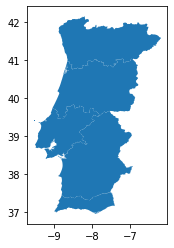

In [18]:
map_df.plot()

## Reading mobility movements (uber example)

Lisbon
weekdays versus weekends

(https://movement.uber.com/explore/lisbon/mobility-heatmap/query)

In [19]:
from shapely.geometry import Point, Polygon

uber = pd.read_csv('/content/drive/My Drive/IN+/lisbon-traversals.csv', delimiter=",")

from shapely import wkt
uber['geometry'] = uber['wktGeometry'].apply(wkt.loads)
uber_geo = gpd.GeoDataFrame(uber, geometry='geometry')
uber_geo

,hexid,dayType,traversals,wktGeometry,geometry
0,8c393362ca1abff,weekday,17,POLYGON ((-9.189445341471695 38.75303424522363...,"POLYGON ((-9.18945 38.75303, -9.18956 38.75299..."
1,8c393362ca1a3ff,weekday,18,POLYGON ((-9.18934760471575 38.752870925255664...,"POLYGON ((-9.18935 38.75287, -9.18946 38.75283..."
2,8c393362caf49ff,weekday,35,POLYGON ((-9.189249868439024 38.75270760525979...,"POLYGON ((-9.18925 38.75271, -9.18937 38.75266..."
3,8c393362caa93ff,weekday,168,"POLYGON ((-9.18950291471715 38.75241236745012,...","POLYGON ((-9.18950 38.75241, -9.18962 38.75237..."
4,8c393362caab3ff,weekday,101,"POLYGON ((-9.1896582230226 38.75195380855492, ...","POLYGON ((-9.18966 38.75195, -9.18978 38.75191..."
...,...,...,...,...,...
72852,8c39337592821ff,weekend,16,POLYGON ((-9.094405853520371 38.78232179913025...,"POLYGON ((-9.09441 38.78232, -9.09452 38.78228..."
72853,8c39336292805ff,weekend,16,POLYGON ((-9.137804034827179 38.73203989975884...,"POLYGON ((-9.13780 38.73204, -9.13792 38.73200..."
72854,8c3933670d9a7ff,weekend,15,"POLYGON ((-9.11324824683482 38.72326750521603,...","POLYGON ((-9.11325 38.72327, -9.11337 38.72322..."
72855,8c393362b39edff,weekend,15,POLYGON ((-9.148346233217227 38.71087585759604...,"POLYGON ((-9.14835 38.71088, -9.14846 38.71083..."


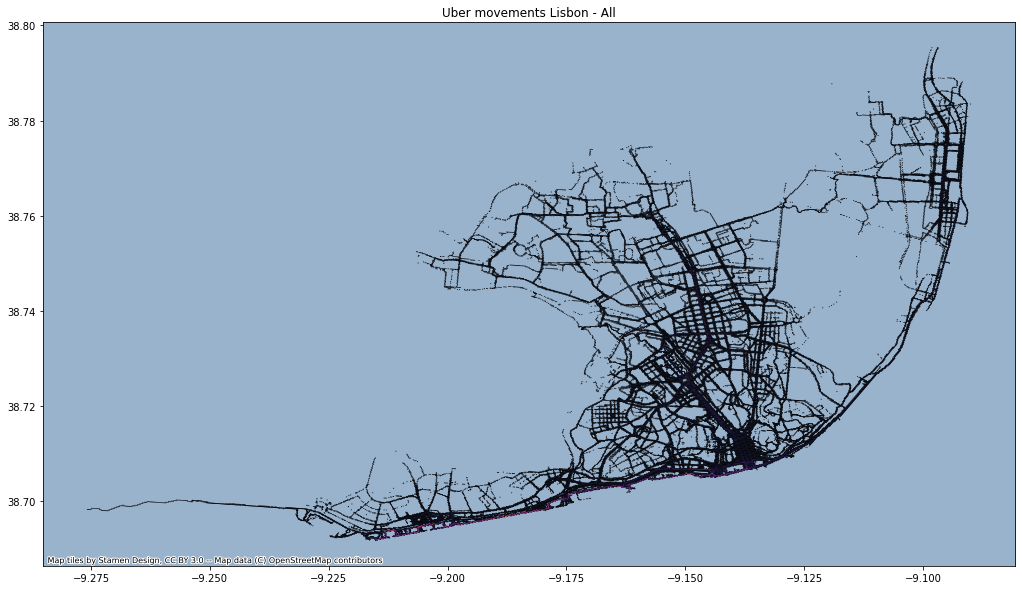

In [20]:
import contextily as ctx
ax6 = uber_geo.plot(figsize=(20,10),column='traversals', cmap='inferno')
ax6.title.set_text('Uber movements Lisbon - All')
ctx.add_basemap(ax6, zoom=13)